<a href="https://colab.research.google.com/github/Felipe-a-Fernandes/intro-net-sci/blob/main/intro.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Códigos para a introdução

Importando bibliotecas necessárias para as análises.

In [ ]:
import networkx as nx
import matplotlib.pyplot as plt
import numpy as np


## Redes não direcionadas

Instanciando um grafo não direcionado e adicionando nós à rede.

In [ ]:
# Instanciando a classe Graph ('Nossa abstração de um grafo não direcionado').
graph = nx.Graph()

# Nele podemos adicionar os nós, pelo método add_node().
graph.add_node(1)
graph.add_node(2)
graph.add_node(3)

# Com o método a seguir pode-se verificar quantos nós a rede possui.
total_nodes = graph.number_of_nodes()
print(f'Número de nós: {total_nodes}')

# Adicionar nós um a um pode ser trabalhoso e cansativo, uma alternativa é mostrada a seguir.
new_nodes = [4, 5, 6]
graph.add_nodes_from(new_nodes)

# Os nós podem ser adicionados de outro grafo também.
another_graph = nx.Graph([('A', 'B'), ('C', 'B')])
graph.add_nodes_from(another_graph)

total_nodes = graph.number_of_nodes()
nodes = graph.nodes
print(f'Número de nós: {total_nodes}\nNós:{nodes}')




Número de nós: 3
Número de nós: 9
Nós:[1, 2, 3, 4, 5, 6, 'A', 'B', 'C']


Adicionando os links entre os nós.

In [ ]:
# Continuando com a mesma rede, vamos ligar alguns nós
graph.add_edge(1, 2)
graph.add_edge(1, 5)
graph.add_edge(1, 'A')
graph.add_edge(4, 5)

# Semelhante aos nós, as arestas podem ser adicionadas a partir de uma lista
list_of_links = [(3, 4), ('C', 'A'), ('A', 'B'), ('B', 6), ('A', 5)]
graph.add_edges_from(list_of_links)

total_links = graph.number_of_edges()
links = graph.edges
print(f'Número de links: {total_links}\nLinks:{links}')

Número de links: 9
Links:[(1, 2), (1, 5), (1, 'A'), (3, 4), (4, 5), (5, 'A'), (6, 'B'), ('A', 'C'), ('A', 'B')]


Obtendo algumas propriedades dos nós e da rede

In [ ]:
# Vamos obter o grau de cada um dos nós da rede da seguinte forma
degree = graph.degree

# Uma lista com tuplas é retornada, onde o primeiro valor é o nó e o segundo seu respectivo grau.
print(f'Nós e seus graus: {degree}')

# Para que seja obtido o grau de um grafo a função average_node_connectivity é usada, passando o grafo como parâmetro
#average_deegre = nx.average_neighbor_degree(graph)
#print(f'Grau médio: {average_deegre}')

Nós e seus graus: [(1, 3), (2, 1), (3, 1), (4, 2), (5, 3), (6, 1), ('A', 4), ('B', 2), ('C', 1)]


Distribuição de grau

Text(0, 0.5, 'Nº de nós')

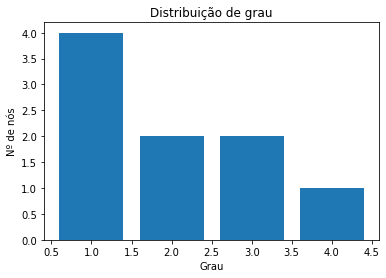

In [ ]:
# Pegando o grau de todos os nós
degrees = [item[1] for item in degree]

# Plotando um gráfico de barras, e usando uma função para agrupar a quantidade
# nós com mesmo grau
plt.bar(*np.unique(degrees, return_counts=True))
plt.title('Distribuição de grau')
plt.xlabel('Grau')
plt.ylabel('Nº de nós')

Plotando o gráfico da nossa primeira rede

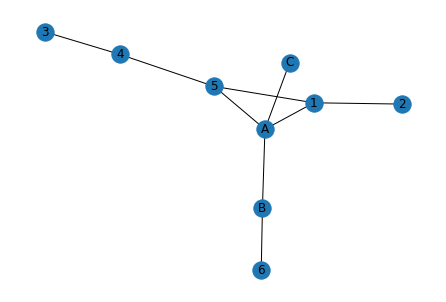

In [ ]:
# A maneira mais simples de fazê-lo é da seguinte maneira.
nx.draw(graph, with_labels=True)

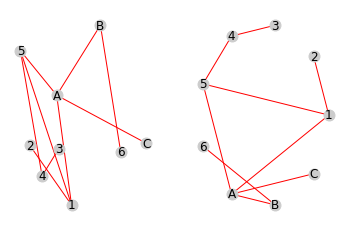

In [ ]:
# Mas há maneiras de melhorar e customizar, dependendo da necessidade.
# A seguir um dicionário é declarado com chaves (atributos) e valores (como serão).
options = {
    'node_color': '#cccccc',
    'node_size': 120,
    'edge_color': 'red',
    'with_labels': True
}

# Essa função desenha a rede de forma aleatória
sub_plot1 = plt.subplot(121)
nx.draw_random(graph, **options)

# Mas ela pode ser desenhada de forma circular
sub_plot2 = plt.subplot(122)
nx.draw_circular(graph, **options)



Matriz de adjacência

In [ ]:
# No caso computacional, é usada uma lista, ou estrutura do tipo, com um nó e quais ele se conecta.
# Se fosse usada uma matriz de adjacência, haveriam muitos zeros armazenados em memória.
# É obtido um dict com chave sendo os nós, e os valores um dicionário com os nós que esse se liga.
adj = graph.adj
print(adj)

# Retorna um objeto
adjacency = graph.adjacency()
for node in adjacency:
  print(node)

{1: {2: {}, 5: {}, 'A': {}}, 2: {1: {}}, 3: {4: {}}, 4: {5: {}, 3: {}}, 5: {1: {}, 4: {}, 'A': {}}, 6: {'B': {}}, 'A': {1: {}, 'C': {}, 'B': {}, 5: {}}, 'B': {'A': {}, 6: {}}, 'C': {'A': {}}}
(1, {2: {}, 5: {}, 'A': {}})
(2, {1: {}})
(3, {4: {}})
(4, {5: {}, 3: {}})
(5, {1: {}, 4: {}, 'A': {}})
(6, {'B': {}})
('A', {1: {}, 'C': {}, 'B': {}, 5: {}})
('B', {'A': {}, 6: {}})
('C', {'A': {}})


## Redes direcionadas

Criando nosso dígrafo, e plotando-o

Text(0.5, 1.0, 'Rede representando ligações entre pessoas')

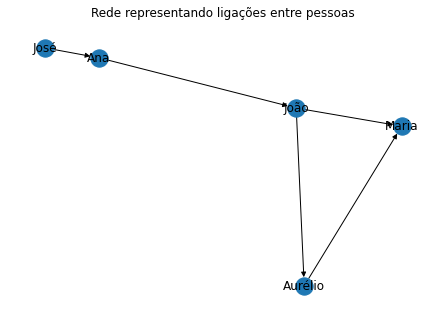

In [ ]:
# Instanciando nosso grafo direcionado ou digrafo
digraph = nx.DiGraph()

# O processo de adicionar nós e arestas ao digrafo é semelhante ao grafo
digraph.add_node('João')
digraph.add_node('Maria')

# Adicionando a partir de uma lista
name_list = ['José', 'Ana', 'Aurélio']
digraph.add_nodes_from(name_list)

# Pode-se aproveitar o momento e adicionar um peso aos links, eles não representam apenas a interação, mas alguma grandeza
digraph.add_edge('João', 'Maria', weight=2)
digraph.add_edge('Aurélio', 'Maria', weight=5)

# Para adicionar várias arestas com pesos, o método usado é outro
call_list = [('João', 'Aurélio', 6), ('Ana', 'João', 1), ('José', 'Ana', 12)]
digraph.add_weighted_edges_from(call_list)

# Plotando essa rede
nx.draw(digraph, with_labels=True)
plt.title('Rede representando ligações entre pessoas')

Algumas propriedades

In [ ]:
# Links entrando e saindo em cada nó da rede
in_degree = digraph.in_degree
out_degree = digraph.out_degree
print(f'Grau de entrada: {in_degree}\nGrau de saida: {out_degree}')

# Grau médio
#d_average_degree = nx.average_node_connectivity(digraph)
#print(f'Grau médio: {d_average_degree}')

Grau de entrada: [('João', 1), ('Maria', 2), ('José', 0), ('Ana', 1), ('Aurélio', 1)]
Grau de saida: [('João', 2), ('Maria', 0), ('José', 1), ('Ana', 1), ('Aurélio', 1)]


Histograma

Text(0, 0.5, '% de ter um grau k_{i}')

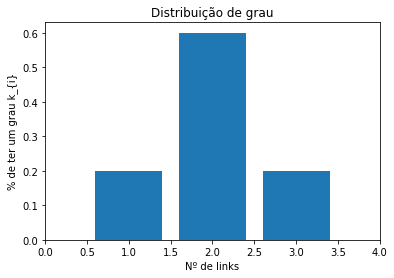

In [ ]:
frequency_of_degree = nx.degree_histogram(digraph)
prob_deg = list(map(lambda x: x/digraph.number_of_nodes(), frequency_of_degree))
n_links = [n for n in range(4)]

plt.bar(n_links, prob_deg)
plt.xlim(0, len(n_links))
plt.title('Distribuição de grau')
plt.xlabel('Nº de links')
plt.ylabel('% de ter um grau k_{i}')

## Caminhos, distâncias e coeficiente de clustering

Shortest path ou menor caminho

In [ ]:
# Calcula todos os menores caminhos, se nada for atribuido ao source e target
shortest_paths = nx.shortest_path(graph)

# O seis indica que o source é 6 e o target é o 5,
# o retorno é uma lista com os nós que serão passados de um ponto ao outro.
shortest_6_to_5 = shortest_paths[6][5]

print(shortest_6_to_5)


[6, 'B', 'A', 5]


Diâmetro da rede

In [ ]:
# Passa um grafo como parâmetro e o retorno é o diâmetro
# o diâmetro é o maior menor caminho
graph_diameter = nx.diameter(graph)

print(f'O diâmetro da rede é: {graph_diameter}')


O diâmetro da rede é: 5


O menor caminho médio

In [ ]:
av_shortest_path = nx.average_shortest_path_length(graph)
print(f'O menor caminho médio vale: {av_shortest_path:.2f}')

O menor caminho médio vale: 2.39


Clustering

In [ ]:
from networkx.algorithms.cluster import clustering, average_clustering

# Identifica o coeficiente de clusterização de todos os nós
clustering_coef = nx.clustering(graph)
clustering_of_A = clustering_coef[1]

print(f'Coeficiente de clusterização: {clustering_of_A:.2f}')

# Média do coeficiente de clusterização
average_clustering_coef = average_clustering(graph)

print(f'Média do coef. de clusterização: {average_clustering_coef:.2f}')

Coeficiente de clusterização: 0.33
Média do coef. de clusterização: 0.09
